# Employee Absenteeism Analysis Project
        PRATIK M. JADHAV
        16th JULY 2019


<br>Content:
1. Introduction](#0)
     * 1.1 [Problem Statement](#1)
     * 1.2 Data(#1)
     * 1.3Exploratory Data Analysis(#2)
2. Methodology
     * 2.1 Pre Processing
     * 2.1.1 Missing Value Analysis
     * 2.1.2 Outlier Analysis
     * 2.1.3 Feature Selection
     * 2.1.4 Feature Scaling
     * 2.2 Modeling
     * 2.2.1 Random Forest
     * 2.2.2 Linear Regression
3. Conclusion
     * Model Evaluation
     * Model Selection
  

# Chapter 1 : Introduction

# 1.1 Problem Statement

XYZ is a courier company. As we appreciate that human capital plays an important role in
collection, transportation and delivery. The company is passing through genuine issue of
Absenteeism. The company has shared it dataset and requested to have an answer on the
following areas:
1. What changes company should bring to reduce the number of absenteeism?
2. How much losses every month can we project in 2011 if same trend of absenteeism
continues?


# 1.2 Data
There are 21 variables in our data in which 20 are independent variables and 1 (Absenteeism
time in hours) is dependent variable. Since our target variable is continuous in nature, this is a
regression problem.
Variables Information:


# 1.3Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their
main characteristics. In the given data set there are 21 variables and data types of all variables
are either float64 or int64. There are 740 observations and 21 columns in our data set. Missing
value is also present in our data.
##### This is clearly a 'Supervised machine learning regression problem' to predict a number based on the input features

In [1]:
##------------- Import all the required libraries--------------

## Import all the required libraries
import os
import pandas as pd
import numpy as np
from scipy import stats


#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#----- for preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

#---- for model building
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#---- for cross validation
#from sklearn.cross_validation import train_test_split

#---- for visualization---
import matplotlib.pyplot as plt 
import seaborn as sn

#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#---- For handling warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
## ------------------- Gather the data -----------------

### Here data is provided as .csv file with the problem.
### Let's import the data 
emp_abntsm=pd.read_excel('Absenteeism_at_work_Project.xls')
emp_abntsm
##---------- --------------------------

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [3]:
#emp_abntsm.Age.head()

In [4]:
# For ease of operations, lets change the names of the columns to short versions
#emp_abntsm.rename(columns=lambda x: x.replace(' ', '_'))
emp_abntsm=emp_abntsm.rename(columns = {'Reason for absence':'Absence_Reason','Month of absence':'Absence_Month','Day of the week':'Absence_Day','Transportation expense': 'Transportation_Expense','Distance from Residence to Work':'Work_Distance','Service time':'Service_Time','Work load Average/day ':'Average_Workload','Hit target': 'Hit_Target','Disciplinary failure':'Disciplinary_Failure','Social drinker':'Drinker','Social smoker':'Smoker','Body mass index':'BMI','Absenteeism time in hours':'Absent_Hours'})
emp_abntsm.head()


,ID,Absence_Reason,Absence_Month,Absence_Day,Seasons,Transportation_Expense,Work_Distance,Service_Time,Age,Average_Workload,...,Disciplinary_Failure,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absent_Hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [5]:
#### --------3a.) Check the shape/properties of the data
## Check the shape of the data
emp_abntsm.shape

# what we can infer:
## ->the dataset has 740 observations and 21 features

(740, 21)

In [6]:
## Check the properties of the data
emp_abntsm.info()
# what we can infer:
# ->There are null values in the dataset
# -> The datatypes are int and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                        740 non-null int64
Absence_Reason            737 non-null float64
Absence_Month             739 non-null float64
Absence_Day               740 non-null int64
Seasons                   740 non-null int64
Transportation_Expense    733 non-null float64
Work_Distance             737 non-null float64
Service_Time              737 non-null float64
Age                       737 non-null float64
Average_Workload          730 non-null float64
Hit_Target                734 non-null float64
Disciplinary_Failure      734 non-null float64
Education                 730 non-null float64
Son                       734 non-null float64
Drinker                   737 non-null float64
Smoker                    736 non-null float64
Pet                       738 non-null float64
Weight                    739 non-null float64
Height                    726 non-null float64
BMI     

In [7]:
emp_abntsm.nunique()

ID                        36
Absence_Reason            28
Absence_Month             13
Absence_Day                5
Seasons                    4
Transportation_Expense    24
Work_Distance             25
Service_Time              18
Age                       22
Average_Workload          38
Hit_Target                13
Disciplinary_Failure       2
Education                  4
Son                        5
Drinker                    2
Smoker                     2
Pet                        6
Weight                    26
Height                    14
BMI                       17
Absent_Hours              19
dtype: int64

## From EDA we have concluded that there are 10 continuous variable and 11 categorical variable in nature.

# Chapter 2 : Methodology
Methodology
Before feeding the data to the model we need to clean the data and convert it to a
proper format. It is the most crucial part of data science project we spend almost 80% of time
in it.


# 2.1 Pre Processing
Any predictive modeling requires that we look at the data before we start modeling.
However, in data mining terms looking at data refers to so much more than just looking.
Looking at data refers to exploring the data, cleaning the data as well as visualizing the data
through graphs and plots. This is often called as Exploratory Data Analysis. To start this process
we will first try and look at all the probability distributions of the variables. Most analysis like
regression, require the data to be normally distributed. We can visualize that in a glance by
looking at the probability distributions or probability density functions of the variable.

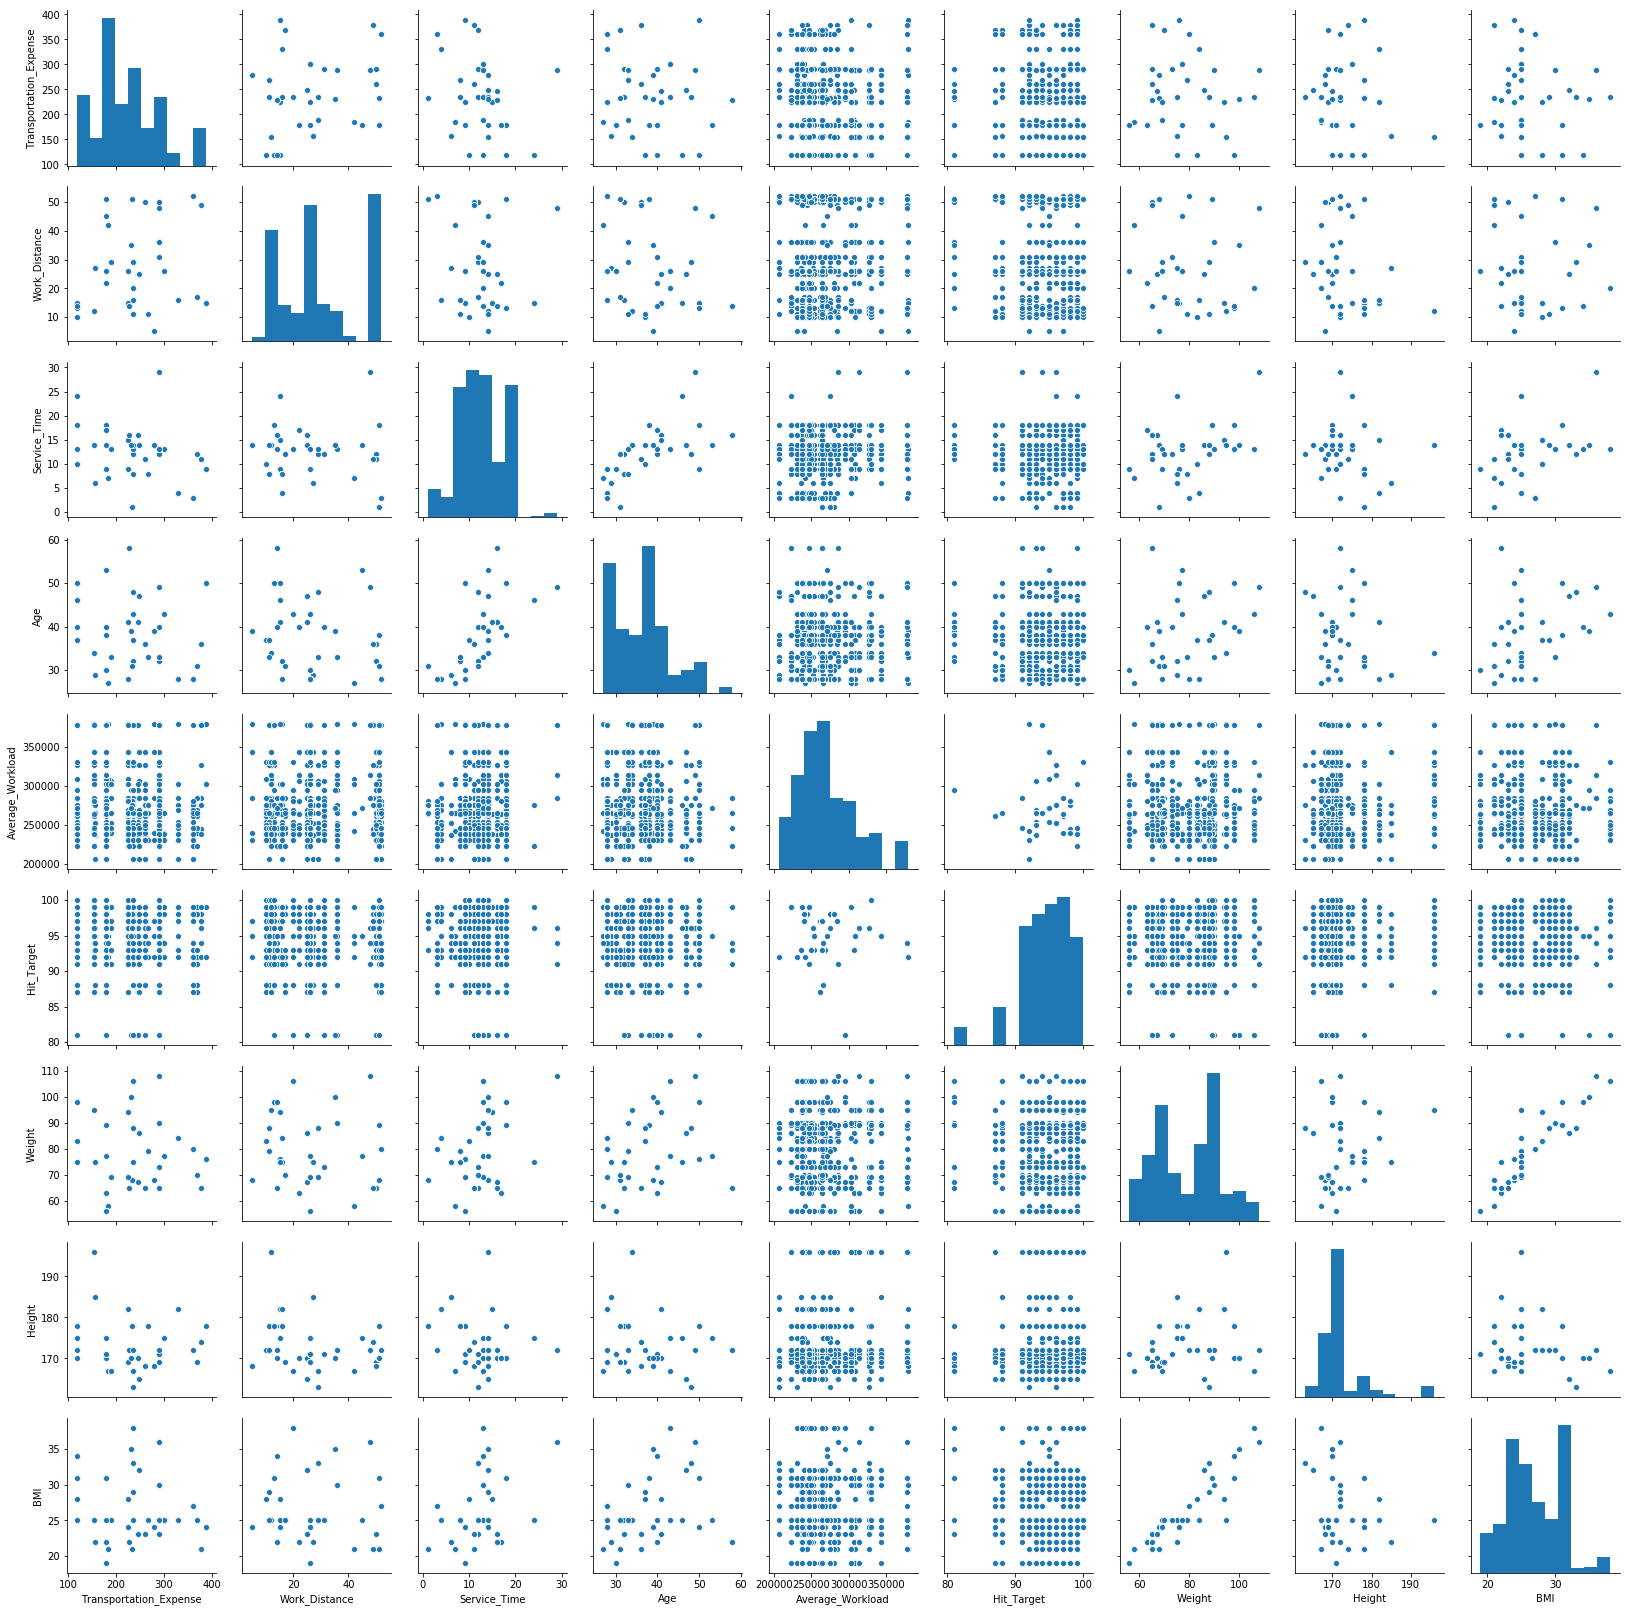

In [8]:
#Visualize the relationship among all continous variables using pairplots
NumericFeatureList=['Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Weight','Height','BMI']
sn.pairplot(emp_abntsm,vars=NumericFeatureList)

# 2.1.1Missing Value Analysis
In statistics, missing data, or missing values, occur when no data value is stored for the
variable in an observation.

Missing data are a common occurrence and can have a significant
effect on the conclusions that can be drawn from the data.
If a columns has more than 30% of data as missing value either we ignore the entire column or we ignore those observations.

In the given data the maximum percentage of missing value is 4.189% for body mass index
column. So we will compute missing value for all the columns.

In [9]:
# Perform missing value analysis and impute missing values if necessary
#-- Calculating % of nulls
(emp_abntsm.isna().sum() / emp_abntsm.shape[0])*100
# what we can infer:
# ->There are  null values in almost all the columns of the dataset, although in small amount.
# -> We'll drop all the null value rows for target variable and 
# -> We'll will impute null values for all other features.

ID                        0.000000
Absence_Reason            0.405405
Absence_Month             0.135135
Absence_Day               0.000000
Seasons                   0.000000
Transportation_Expense    0.945946
Work_Distance             0.405405
Service_Time              0.405405
Age                       0.405405
Average_Workload          1.351351
Hit_Target                0.810811
Disciplinary_Failure      0.810811
Education                 1.351351
Son                       0.810811
Drinker                   0.405405
Smoker                    0.540541
Pet                       0.270270
Weight                    0.135135
Height                    1.891892
BMI                       4.189189
Absent_Hours              2.972973
dtype: float64

In [10]:
emp_abntsm.isnull().sum()

ID                         0
Absence_Reason             3
Absence_Month              1
Absence_Day                0
Seasons                    0
Transportation_Expense     7
Work_Distance              3
Service_Time               3
Age                        3
Average_Workload          10
Hit_Target                 6
Disciplinary_Failure       6
Education                 10
Son                        6
Drinker                    3
Smoker                     4
Pet                        2
Weight                     1
Height                    14
BMI                       31
Absent_Hours              22
dtype: int64

In [11]:
#-- impute missing values in all the independent featues(exept Average_Workload)
#-- Replace missing of any any employee with  information of same employee from other instances
#-- example if 'Age' of employee 1 is missing, then impute it with 'Age' from other instance of employee 1.
final_col = ['Transportation_Expense','Work_Distance','Service_Time','Age','Hit_Target',
             'Son','Pet','Weight','Height','BMI']
#----impute missing values and Nas --------
for i in emp_abntsm['ID'].unique(): 
    for j in final_col :
        emp_abntsm.loc[((emp_abntsm['ID'] == i) & (emp_abntsm[j].isna())), j] = emp_abntsm[(emp_abntsm.ID==i)][j].mean()

In [12]:
final_col2 = ['Absence_Reason','Absence_Month', 'Disciplinary_Failure', 'Education', 'Drinker', 'Smoker']
#----impute missing values and Nas --------
for i in emp_abntsm['ID'].unique(): 
    for j in final_col2 :
        emp_abntsm.loc[((emp_abntsm['ID'] == i) & (emp_abntsm[j].isna())), j] = emp_abntsm[(emp_abntsm.ID==i)][j].median()

In [13]:
# update workload with the mode of corresponding month's workload
for i in emp_abntsm['Absence_Month'].unique(): 
    frequent_wrkld = stats.mode(emp_abntsm[emp_abntsm['Absence_Month']==i]['Average_Workload'])[0][0]
    emp_abntsm.loc[((emp_abntsm['Absence_Month']==i) & pd.isna(emp_abntsm['Average_Workload'])),'Average_Workload'] = frequent_wrkld

In [14]:
#Fill missing values of 'Absent_Hours' with 0
emp_abntsm.Absent_Hours = emp_abntsm.Absent_Hours.fillna(0)

In [15]:
emp_abntsm.isnull().sum()

ID                        0
Absence_Reason            0
Absence_Month             0
Absence_Day               0
Seasons                   0
Transportation_Expense    0
Work_Distance             0
Service_Time              0
Age                       0
Average_Workload          0
Hit_Target                0
Disciplinary_Failure      0
Education                 0
Son                       0
Drinker                   0
Smoker                    0
Pet                       0
Weight                    0
Height                    0
BMI                       0
Absent_Hours              0
dtype: int64

#---------------------------------------- Missing Value handling ENDS here ----------------------------------

# 2.1.2 Outlier Analysis
We can clearly observe from these probability distributions that most of the variables
are skewed. The skew in these distributions can be most likely explained by the presence of
outliers and extreme values in the data. One of the other steps of pre-processing apart from
checking for normality is the presence of outliers. In this case we use a classic approach of
removing outliers. We visualize the outliers using boxplots.
In figure we have plotted the boxplots of the 11 predictor variables with respect to
Absenteeism time in hour. A lot of useful inferences can be made from these plots. First as you
can see, we have a lot of outliers and extreme values in each of the data set.

In [16]:
emp_abntsm.columns

Index(['ID', 'Absence_Reason', 'Absence_Month', 'Absence_Day', 'Seasons',
       'Transportation_Expense', 'Work_Distance', 'Service_Time', 'Age',
       'Average_Workload', 'Hit_Target', 'Disciplinary_Failure', 'Education',
       'Son', 'Drinker', 'Smoker', 'Pet', 'Weight', 'Height', 'BMI',
       'Absent_Hours'],
      dtype='object')

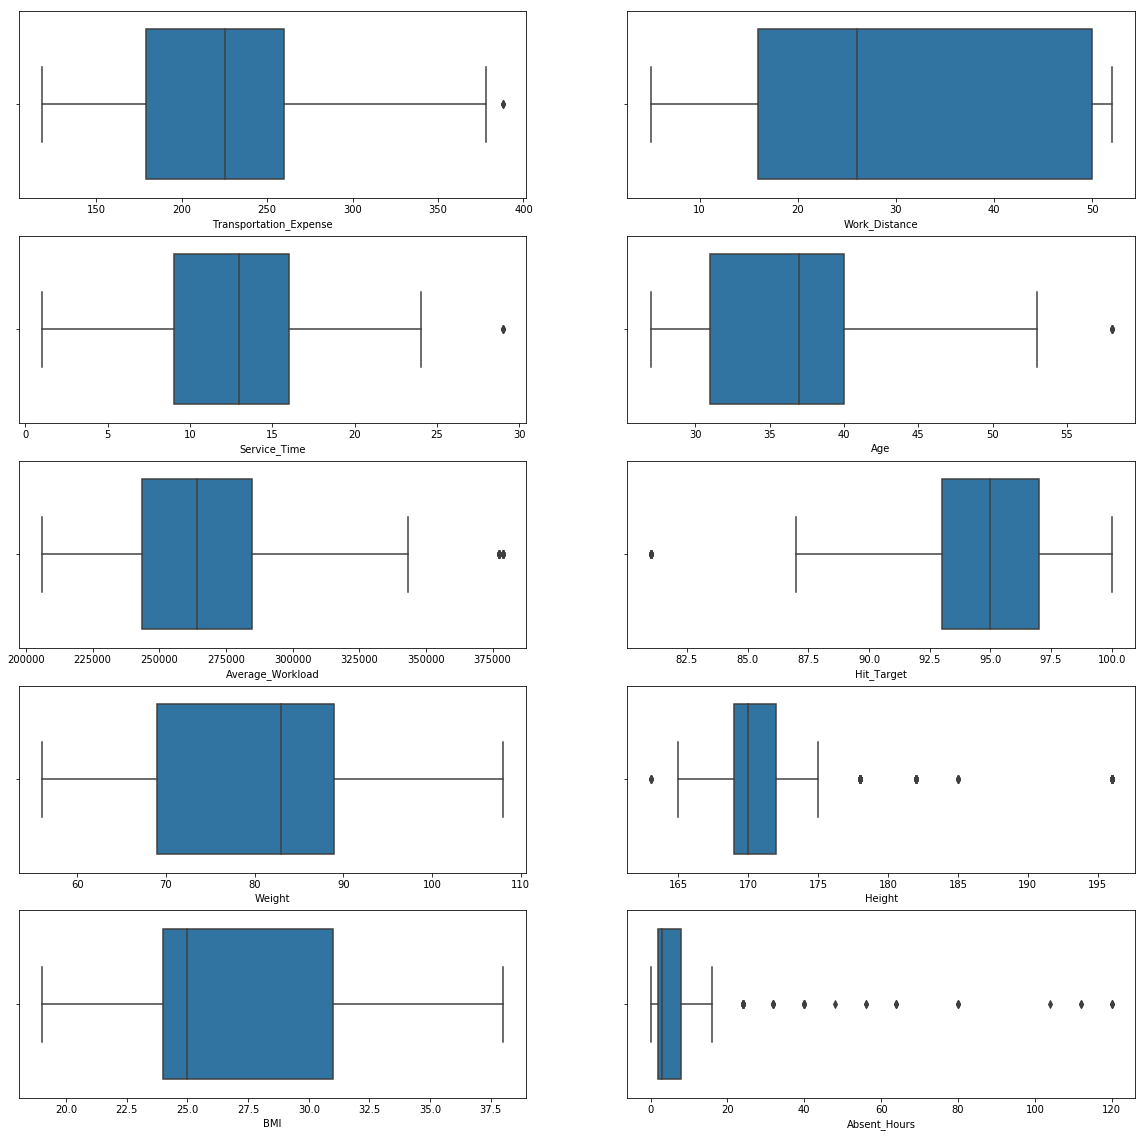

In [17]:
box = ['Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Weight','Height','BMI','Absent_Hours']
row = 5
col = 2
r = 0
c=0
i=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while r < row:
    c =0
    while c < col:
        sn.boxplot(x=box[i], y=None, hue=None, data=emp_abntsm, order=None, hue_order=None, orient=None, color=None, palette=None,ax=ax[r,c])
        c=c+1
        i=i+1
    r=r+1

From the boxplot almost all the variables except “Distancefrom residence to work”,
“Weight” and “Body mass index” consists of outliers.

In [18]:
z = np.abs(stats.zscore(emp_abntsm))
print(z)

[[0.63716146 0.80578526 0.1990436  ... 0.01904601 0.77593223 0.20799855]
 [1.63271857 2.28067868 0.1990436  ... 0.97582783 1.00943766 0.50832817]
 [1.36352307 0.4496548  0.1990436  ... 0.35067062 1.00943766 0.35816336]
 ...
 [1.27272787 2.28067868 1.84061186 ... 0.35067062 1.70995395 0.50832817]
 [0.90954706 2.28067868 1.84061186 ... 0.35067062 1.94345938 0.50832817]
 [1.54192337 2.28067868 1.84061186 ... 0.47839091 0.39159492 0.50832817]]


In [19]:
#show only those values having z > threshold
threshold = 3
print(np.where(z > threshold))

(array([  1,   3,   8,  27,  31,  31,  33,  33,  38,  38,  44,  51,  54,
        55,  58,  64,  83,  85,  89,  91,  99, 104, 116, 140, 157, 158,
       164, 165, 167, 169, 172, 180, 186, 188, 197, 199, 200, 203, 203,
       203, 205, 206, 210, 213, 213, 214, 215, 215, 216, 226, 231, 232,
       234, 236, 242, 245, 251, 253, 255, 256, 257, 270, 271, 272, 273,
       273, 274, 275, 276, 276, 277, 277, 278, 279, 280, 281, 282, 283,
       284, 285, 285, 286, 287, 288, 293, 294, 299, 300, 303, 311, 312,
       313, 313, 322, 323, 325, 336, 336, 337, 337, 337, 355, 360, 362,
       384, 396, 397, 400, 405, 406, 407, 420, 421, 432, 433, 434, 446,
       468, 469, 469, 471, 479, 481, 488, 498, 507, 510, 513, 521, 530,
       548, 549, 551, 562, 564, 569, 569, 572, 573, 575, 576, 577, 579,
       592, 594, 601, 603, 608, 620, 622, 622, 640, 647, 648, 652, 661,
       670, 675, 681, 682, 682, 683, 688, 690, 690, 691, 692, 692, 695,
       702, 703, 704, 706, 710, 712, 714, 714, 714, 715, 721, 7

In [20]:
emp_abntsm_new = emp_abntsm[(z < 3).all(axis=1)]
#keeping only those values in boston_df_edited where z score is lower than 3.

In [21]:
emp_abntsm.shape

(740, 21)

In [22]:
emp_abntsm_new.shape

(577, 21)

# 2.1.3 Feature Selection
Before performing any type of modeling we need to assess the importance of each
predictor variable in our analysis. There is a possibility that many variables in our analysis are
not important at all to the problem of class prediction.Selecting subset of relevant columns for
the model construction is known as Feature Selection. We cannot use all the features because
some features may be carrying the same information or irrelevant information which can
increase overhead. To reduce overhead we adopt feature selection technique to extract 

In [23]:
#### 3d.) ------- Converting -- Converting data to proper formats
# features like 'Absence_Month','Education' are categories here. Lets convert to categories
categorical_var = ['Absence_Reason','Absence_Month','Absence_Day','Seasons','Disciplinary_Failure','Education','Son','Drinker','Smoker','Pet']
continous_var = ['ID','Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Weight','Height','BMI']
target_var = ['Absent_Hours']

for i in categorical_var:
    emp_abntsm_new[i] = emp_abntsm_new[i].astype("category")
emp_abntsm_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 739
Data columns (total 21 columns):
ID                        577 non-null int64
Absence_Reason            577 non-null category
Absence_Month             577 non-null category
Absence_Day               577 non-null category
Seasons                   577 non-null category
Transportation_Expense    577 non-null float64
Work_Distance             577 non-null float64
Service_Time              577 non-null float64
Age                       577 non-null float64
Average_Workload          577 non-null float64
Hit_Target                577 non-null float64
Disciplinary_Failure      577 non-null category
Education                 577 non-null category
Son                       577 non-null category
Drinker                   577 non-null category
Smoker                    577 non-null category
Pet                       577 non-null category
Weight                    577 non-null float64
Height                    577 non-null fl

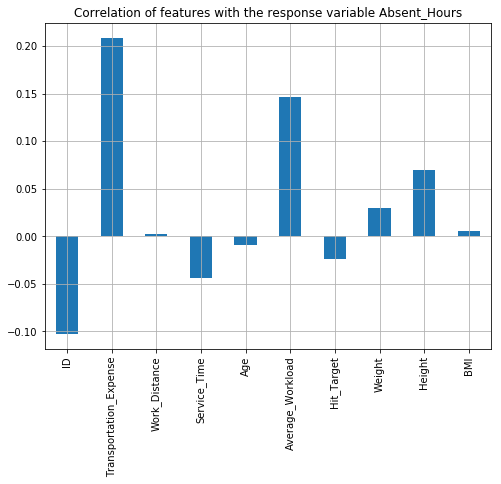

In [24]:
#------------- Explore continous features -----------------
##Explore the correlation btwn the independent continous features with target variabe
corr=emp_abntsm_new[continous_var].corrwith(emp_abntsm_new.Absent_Hours)
corr.plot.bar(figsize=(8,6), title='Correlation of features with the response variable Absent_Hours', grid=True, legend=False, style=None, fontsize=None, colormap=None, label=None)

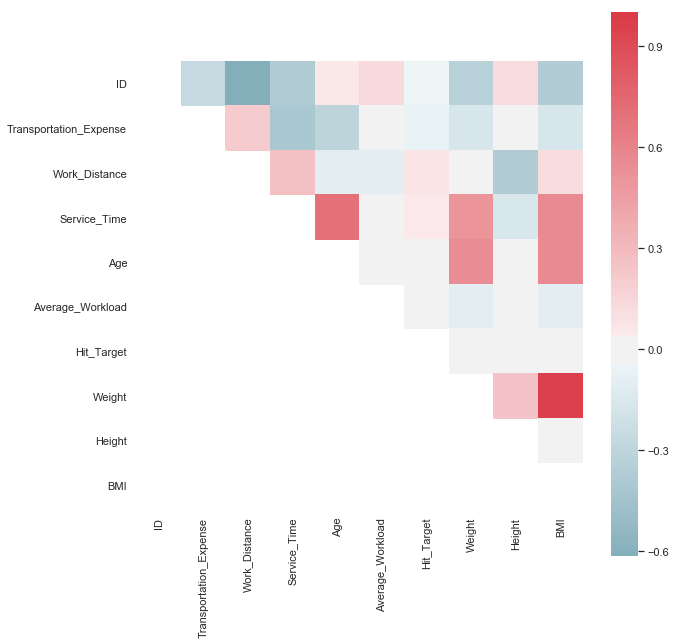

In [25]:
##------heatmap for correlation matrix---------##
##to check multicollinearity ---##

corr = emp_abntsm_new[continous_var].corr()
#correlation matrix
sn.set(style='white')
#compute correlation matrix
#corr =bike.drop(columns=['cnt']).corr()
#generate a mask for upper triangle#
mask =np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)]=True
#setuop the matplotlab figure
f,ax=plt.subplots(figsize=(10,10))
#generate a custom diverging colormap
cmap=sn.diverging_palette(220, 10, s=75, l=50, sep=10, n=6, center='light', as_cmap=True)
#heatmap
sn.heatmap(corr, vmin=None, vmax=None, cmap=cmap, center=0, robust=False, fmt='.2g', linewidths=0, linecolor='white', square=True, mask=mask, ax=None)
#correlation matrix

In [26]:
# This shows that there is multicollinearity in the dataset. BMI and Weight are highly correlated. 'Service_Time' and 'Age' are also correlated
#Will have to deal with multi collinearity by removing few features from the dataset.

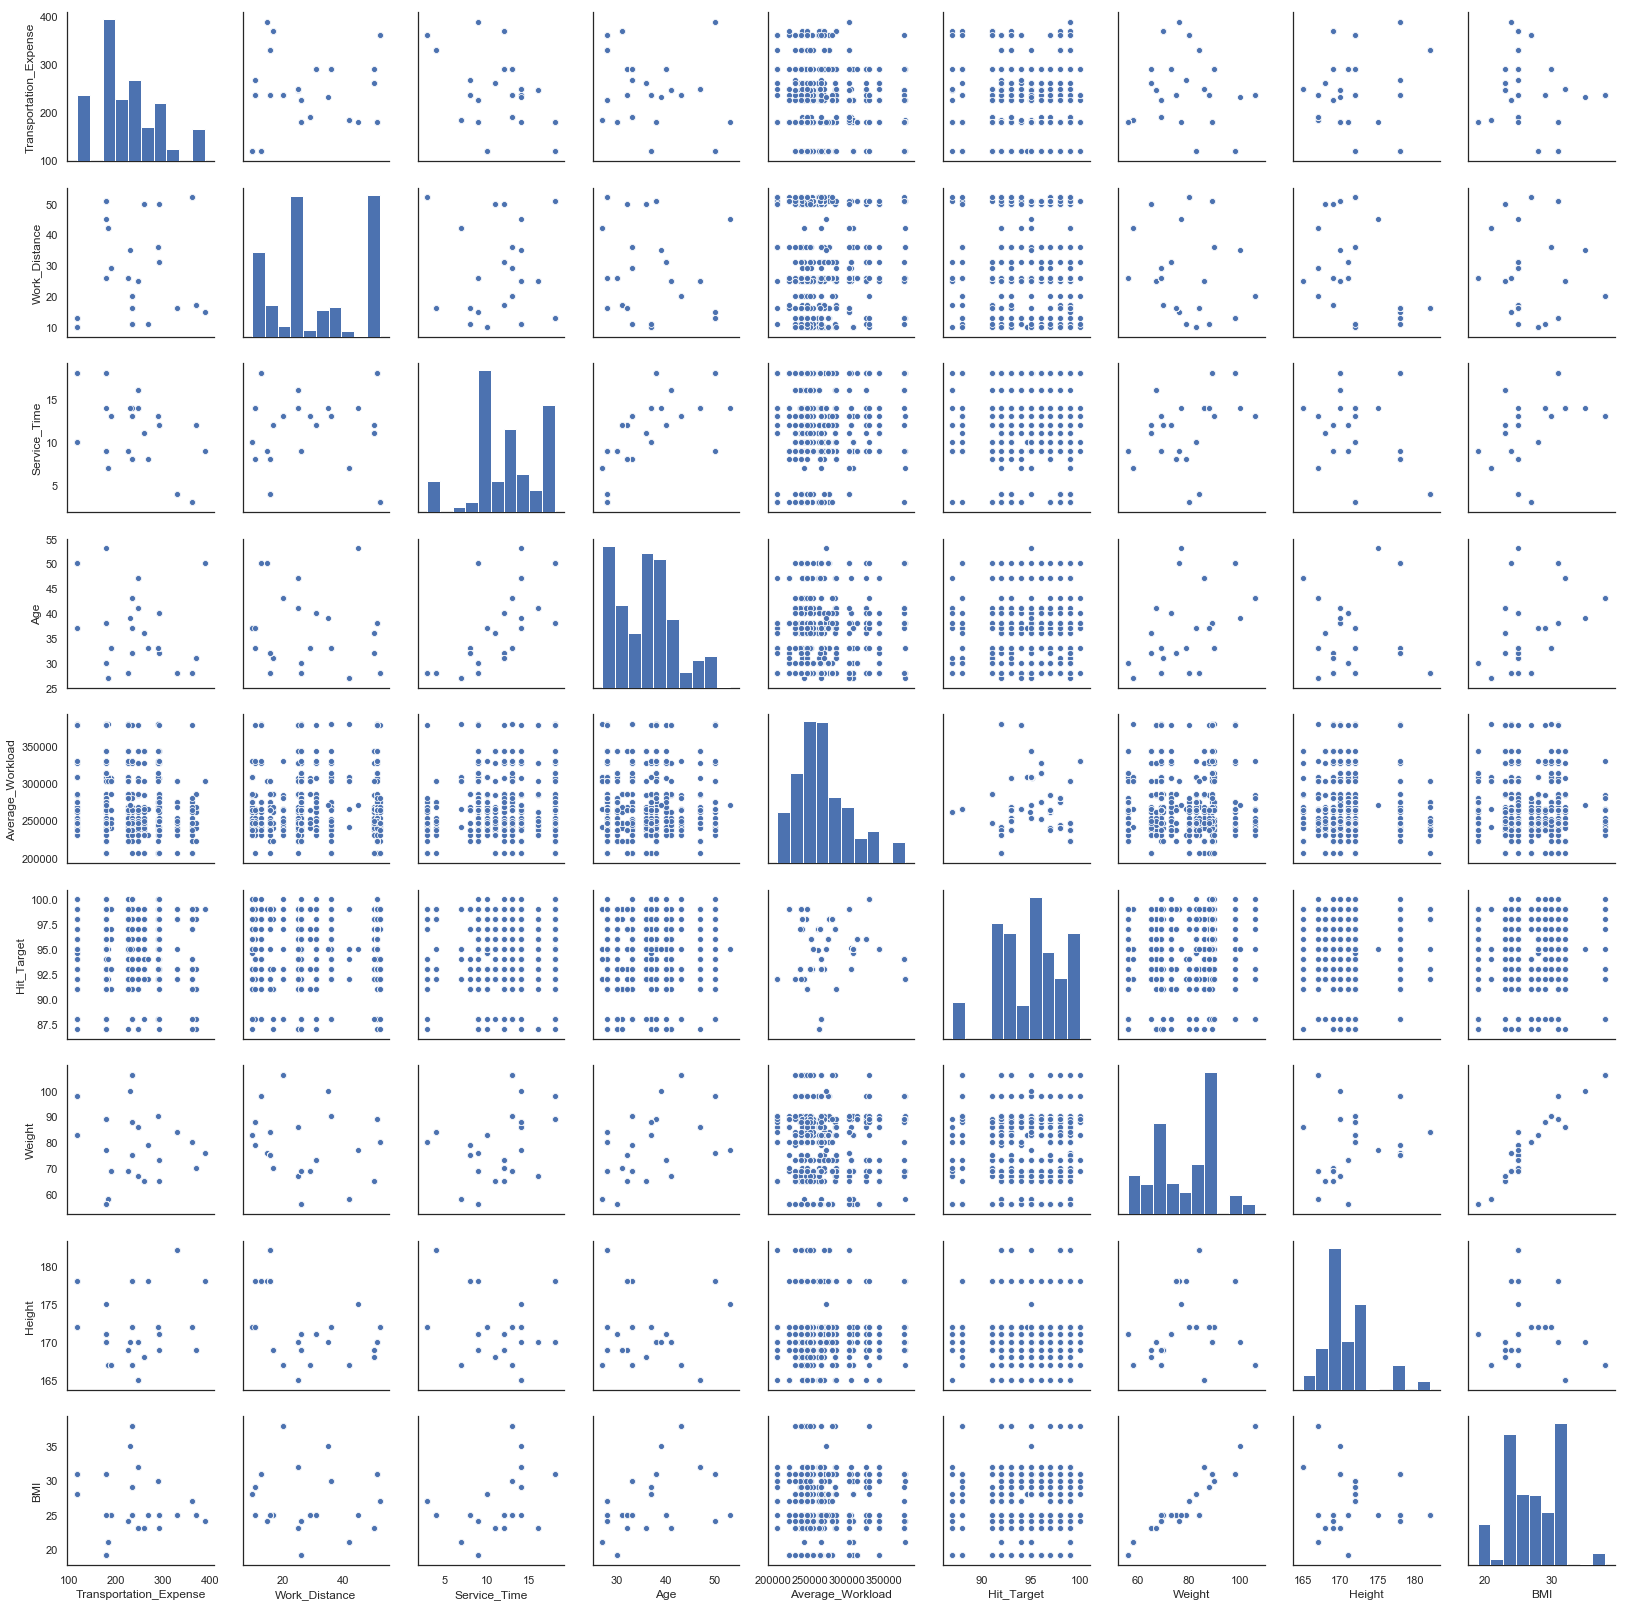

In [27]:
#Visualize the relationship among all continous variables using pairplots
NumericFeatureList=['Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Weight','Height','BMI']
sn.pairplot(emp_abntsm_new,vars=NumericFeatureList)

# 2.2.4 Feature Scaling

Feature scaling is a method used to standardize the range of independent variables or
features of data. In data processing, it is also known as data normalization and is generally
performed during the data preprocessing step. Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly
without normalization. For example, the majority of classifiers calculate the distance between
two points by the Euclidean distance. If one of the features has a broad range of values, the
distance will be governed by this particular feature. Therefore, the range of all features should
be normalized so that each feature contributes approximately proportionately to the final
distance. Since our data is not uniformly distributed we will use Normalization as Feature
Scaling Method.

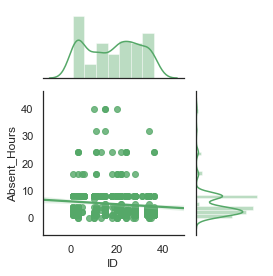

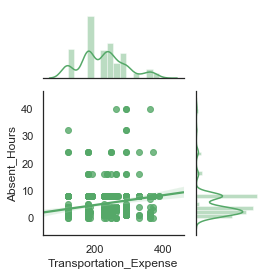

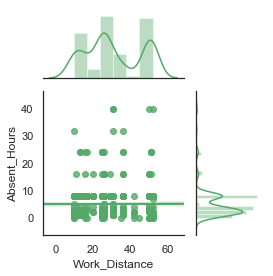

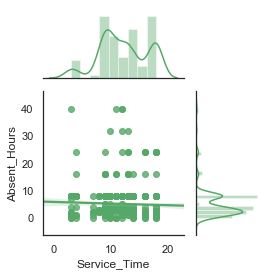

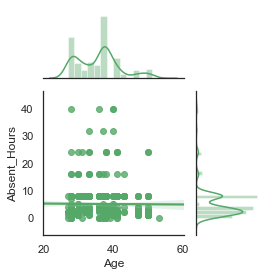

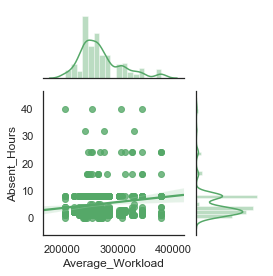

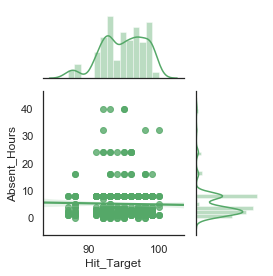

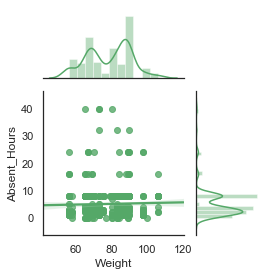

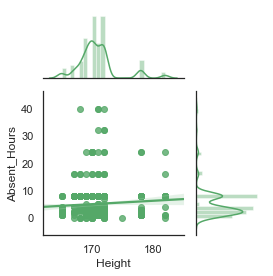

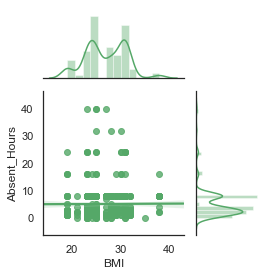

In [28]:
#Lets explore some more, the relationship btwn independent continous variables and dependent variable using JOINT PLOTs
#graph individual numeric features by 'Absent_Hours'
for i in continous_var:
    sn.jointplot(i, "Absent_Hours", data=emp_abntsm_new, kind='reg', color='g', size=4, ratio=2, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None)

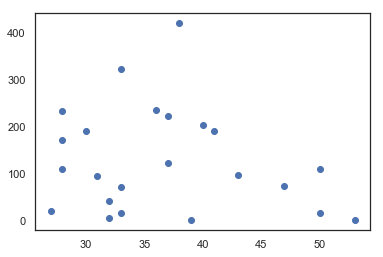

In [29]:
#--- Checking the effect of 'Age' on 'Absence'
#--- Aggregate data by 'Age' and by total hours of absence
emp_hours = emp_abntsm_new[['ID','Absent_Hours']].groupby('ID').sum().reset_index()
emp_age = emp_abntsm_new[['ID','Age']].groupby('ID').max().reset_index()
absence_by_age = emp_hours.merge(emp_age, how='inner',left_on='ID', right_on='ID')

plt.scatter('Age', 'Absent_Hours', data=absence_by_age)

In [30]:
# Clearly, people over 40+ years of age tends to take less leaves compare to others

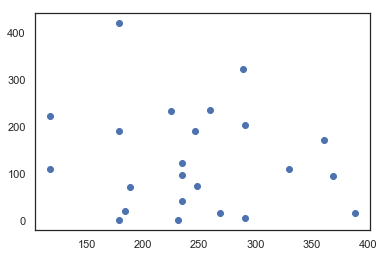

In [31]:
#--- Checking the effect of 'Transportation_Expense' on 'Absence'
#--- Aggregate data by 'Transportation_Expense' and by total hours of absence

emp_transport = emp_abntsm_new[['ID','Transportation_Expense']].groupby('ID').max().reset_index()
absence_by_transport = emp_hours.merge(emp_transport, how='inner',left_on='ID', right_on='ID')

plt.scatter('Transportation_Expense', 'Absent_Hours', data=absence_by_transport)

In [32]:
# This clearly shows concentration of leaves more whre the Transportation_Expense is between 150-300

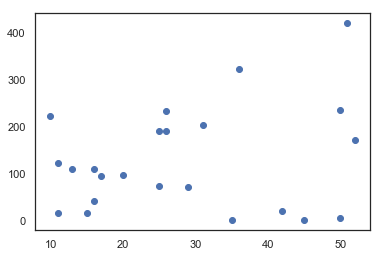

In [33]:
#--- Checking the effect of 'Work_Distance' on 'Absence'
#--- Aggregate data by 'Work_Distance' and by total hours of absence

emp_distance = emp_abntsm_new[['ID','Work_Distance']].groupby('ID').max().reset_index()
absence_by_distance = emp_hours.merge(emp_distance, how='inner',left_on='ID', right_on='ID')

plt.scatter('Work_Distance', 'Absent_Hours', data=absence_by_distance)

In [34]:
# This clearly shows concentration of leaves more where the distance from work is between 10-30 km

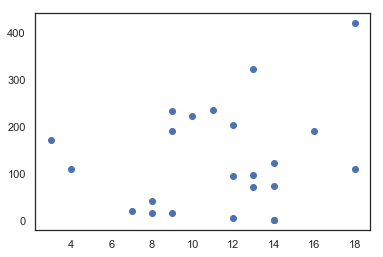

In [35]:
#--- Checking the effect of 'Service_Time' on 'Absence'
#--- Aggregate data by 'Service_Time' and by total hours of absence

emp_service = emp_abntsm_new[['ID','Service_Time']].groupby('ID').max().reset_index()
absence_by_service = emp_hours.merge(emp_service, how='inner',left_on='ID', right_on='ID')

plt.scatter('Service_Time', 'Absent_Hours', data=absence_by_service)

In [36]:
# Evident from above, employees with service years < 8 and >18 tends to take less leaves

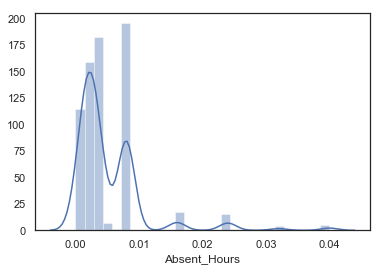

In [37]:
# Checking the distribution of target feature
sn.distplot(emp_abntsm_new['Absent_Hours']/1000, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

In [38]:
# what we can infer from above analysis of continous variables:
# -> Target variable 'Absent_Hours' is not normally distributed, which is not a good thing. 
# -> We have to look in to this, before feeding the data to model.

# -> 'Work_Distance','Age','Average_Workload' has good correlation with target feature 'Absent_Hours'.
# -> Let's drop others from further analysis.

# -> There is multi collinearity in dataset. 'Work_Distance' and 'Transportation_Expense' are correlated. 
# -> However, since p(Transportation_Expense) > p(Work_Distance), we'll drop Transportation_Expense from further analysis.

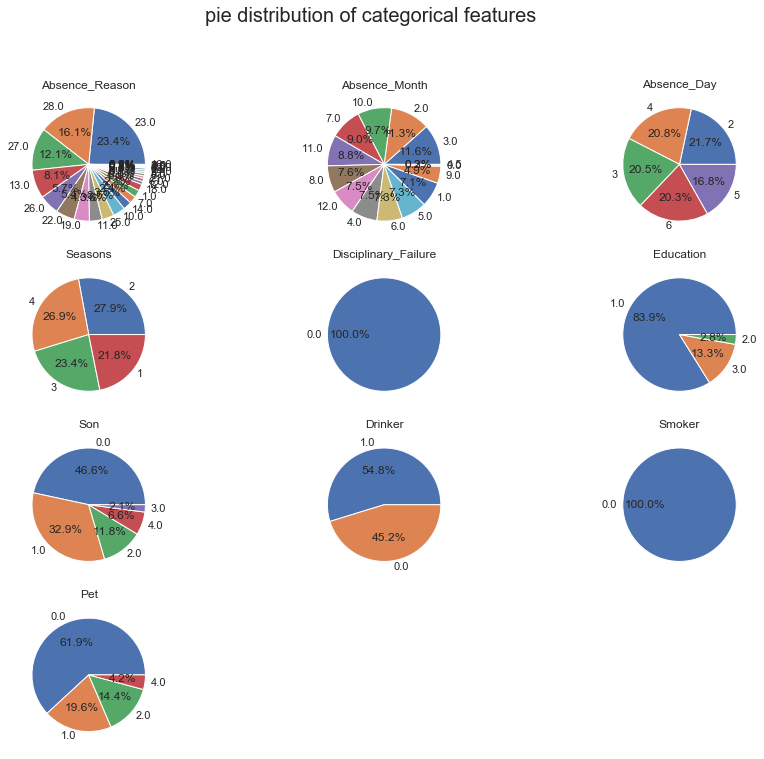

In [39]:
#------------- Explore categorical features ------------------

##checking the pie chart distribution of categorical variables
emp_piplot=emp_abntsm_new[categorical_var]
plt.figure(figsize=(15,12))
plt.suptitle('pie distribution of categorical features', fontsize=20)
for i in range(1,emp_piplot.shape[1]+1):
    plt.subplot(4,3,i)
    f=plt.gca()
    f.set_title(emp_piplot.columns.values[i-1])
    values=emp_piplot.iloc[:,i-1].value_counts(normalize=True).values
    index=emp_piplot.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.1f%%')
#plt.tight_layout()

In [40]:

### These pie distributions are based on the frequency of the 'leaves' taken , not on the tot no. of leaves taken.

#What we can infer from above piplot:

#-> From 'Reason' distribution, we can see that most frequent leaves are taken for the reason 23,28,27
#--------> #23 - medical consultation (23),
#--------> #28 - dental consultation (28)
#--------> #27- physiotherapy (27), 
#--------> #13 - Diseases of the musculoskeletal system and connective tissue 
#--------> #19 - Injury, poisoning and certain other consequences of external causes
#--------> #10 - Diseases of the respiratory system

#->From, 'Month' distribution, we can see that frquency of leaves are more or less uniformally distributed over months, with highest no. of leaves taken in March, Feb and July(holiday season)

#->From, 'Education' distribution, we can see that frquency of leaves are highest for education = 1(highschool)

#->From, 'Weekday' distribution, we can see that frquency of leaves are mostly distributed, with most frequent leaves on 'Monday', which makes sense as most people travel/party over weekend and the mood spills over to Monday :)

#-> From, 'Son' and 'Pet', we can see that people having no kids and no pets(no family responsibilities) tend to take frequent leaves.

#-> 'Social Drinker' takes little more leaves than non drinker.


In [41]:
# --- Now let's analyze the absence by total hours of absence (not by frequency) ----

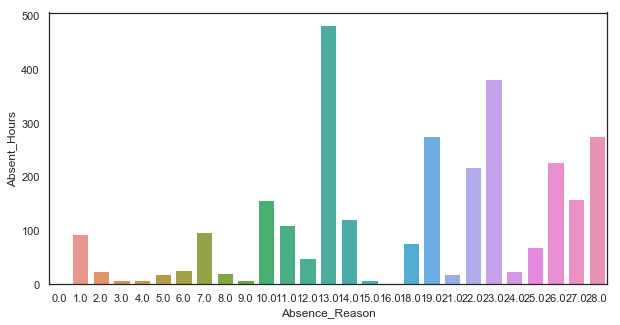

In [42]:
#--- Checking for the reason of Absence---
#checking the top reasons for absence as per the total numbers of absence
emp_reason_tot_hours = emp_abntsm_new[['Absence_Reason','Absent_Hours']].groupby('Absence_Reason').sum().sort_values('Absent_Hours').reset_index()
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,5)
sn.barplot(x='Absence_Reason', y='Absent_Hours', hue=None, data=emp_reason_tot_hours, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax)

#---- Longest hours of absences for reason 13,19,23,28
#--------> #23 - medical consultation (23),
#--------> #24 - blood donation (24),  
#--------> #27- physiotherapy (27), 
#--------> #28 - dental consultation (28)
#--------> #13 - Diseases of the musculoskeletal system and connective tissue 
#--------> #19 - Injury, poisoning and certain other consequences of external causes

#### Overall, 
#---> Seems like employee takes most absences for medical consulations/dental consultation/physiotherapy.
#---> these hours can be rduced by setting up a medical consultation/dental consultation/physiotherapy booth(with visiting doctors may be) at office/facility
#---> In long term, introducing exercise/yoga sessions in office once/twice a week will help reduce physiotherapy issues

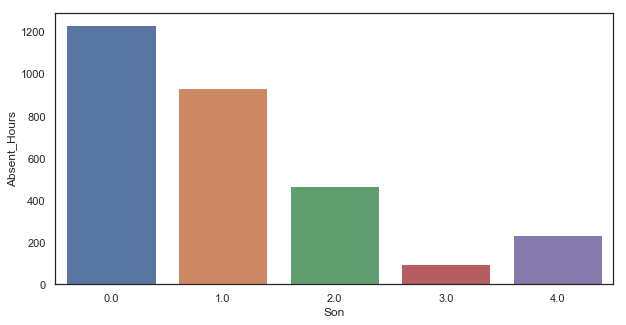

In [43]:
#Analyzing absence dependency of no of kids
emp_son_tot = emp_abntsm_new[['Son','Absent_Hours']].groupby('Son').sum().sort_values('Absent_Hours').reset_index()
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,5)
sn.barplot(x='Son', y='Absent_Hours', hue=None, data=emp_son_tot, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax)

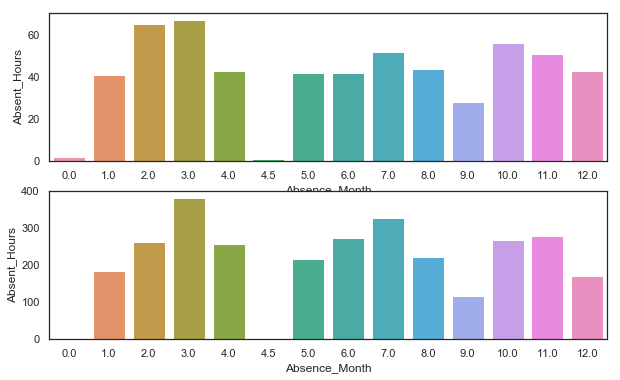

In [44]:
#Analyzing absence dependency of month of year

#--leaves by frquency 
emp_month_frequent = emp_abntsm_new[['Absence_Month','Absent_Hours']].groupby('Absence_Month').count().sort_values('Absent_Hours').reset_index()

#--Leaves by total hours
emp_month_tot = emp_abntsm_new[['Absence_Month','Absent_Hours']].groupby('Absence_Month').sum().sort_values('Absent_Hours').reset_index()
fig,ax = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,6)
sn.barplot(x='Absence_Month', y='Absent_Hours', hue=None, data=emp_month_frequent, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax[0])
sn.barplot(x='Absence_Month', y='Absent_Hours', hue=None, data=emp_month_tot, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax[1])

#--> Clearly, March tops the month for most absences. This makes sense as this is peak holiday season due to change of weather and clear and sunny sky
#--> Second one is July, which again is the 'holiday' season 

In [45]:
#------ Exploratory Data Analysis ENDS Here------------------
# Final observations:
#1.) 
#------------------------------------------------------------

In [46]:
#----------------------Prepare data for modelling ------------------


In [47]:
#---- Drop the features which are not very relevant based on above analyses
emp_df  = emp_abntsm_new[['ID','Absence_Month','Son','Drinker','Work_Distance','Service_Time','Age','Average_Workload','Absent_Hours']]

#---- Now, since we need to predict the losses per month, Lets aggregate the data on month(and ID, since the features category is different for each ID) before feeding the data to model.

In [48]:
#----Lets aggregate the data on 'Month' and 'Id'
emp_num = emp_df[['ID','Absence_Month','Work_Distance','Service_Time','Age','Average_Workload']].groupby(['ID','Absence_Month']).max().reset_index()
emp_tgt = emp_df[['ID','Absence_Month','Absent_Hours']].groupby(['ID','Absence_Month']).sum().reset_index()
emp_cat = emp_abntsm[['ID','Absence_Month','Son','Drinker']].groupby(['ID','Absence_Month']).max().reset_index()
emp = emp_num.merge(emp_cat, how='inner',left_on=['ID','Absence_Month'], right_on=['ID','Absence_Month']).merge(emp_tgt, how='inner',left_on=['ID','Absence_Month'], right_on=['ID','Absence_Month'])
emp.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1,11.0,14.0,37.0,330061.0,1.0,0.0,1.0
1,1,3,11.0,14.0,37.0,244387.0,1.0,0.0,16.0
2,1,4,11.0,14.0,37.0,326452.0,1.0,0.0,11.0
3,1,5,11.0,14.0,37.0,246074.0,1.0,0.0,16.0
4,1,6,11.0,14.0,37.0,377550.0,1.0,0.0,24.0


In [49]:
#--- Lets deal with Nans introduced(same way already done above, by imputing)

#---- imputing Nan values with max each value present for a particular id. eg. Age will always be same for any id.
final_col = ['Work_Distance','Service_Time','Age','Drinker','Son']
#----impute missing values and Nas --------
for i in emp['ID'].unique(): 
    for j in final_col :
        emp.loc[((emp['ID'] == i) & (emp[j].isna())), j] = emp[(emp.ID==i)][j].max()
        
# update workload with the mode of corresponding month's workload
for i in emp['Absence_Month'].unique(): 
    frequent_wrkld = stats.mode(emp[emp['Absence_Month']==i]['Average_Workload'])[0][0]
    emp.loc[((emp['Absence_Month']==i) & pd.isna(emp['Average_Workload'])),'Average_Workload'] = frequent_wrkld

#update NA 'Absent_Hours' with 0
emp.Absent_Hours = emp.Absent_Hours.fillna(0)

In [50]:
emp.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1,11.0,14.0,37.0,330061.0,1.0,0.0,1.0
1,1,3,11.0,14.0,37.0,244387.0,1.0,0.0,16.0
2,1,4,11.0,14.0,37.0,326452.0,1.0,0.0,11.0
3,1,5,11.0,14.0,37.0,246074.0,1.0,0.0,16.0
4,1,6,11.0,14.0,37.0,377550.0,1.0,0.0,24.0


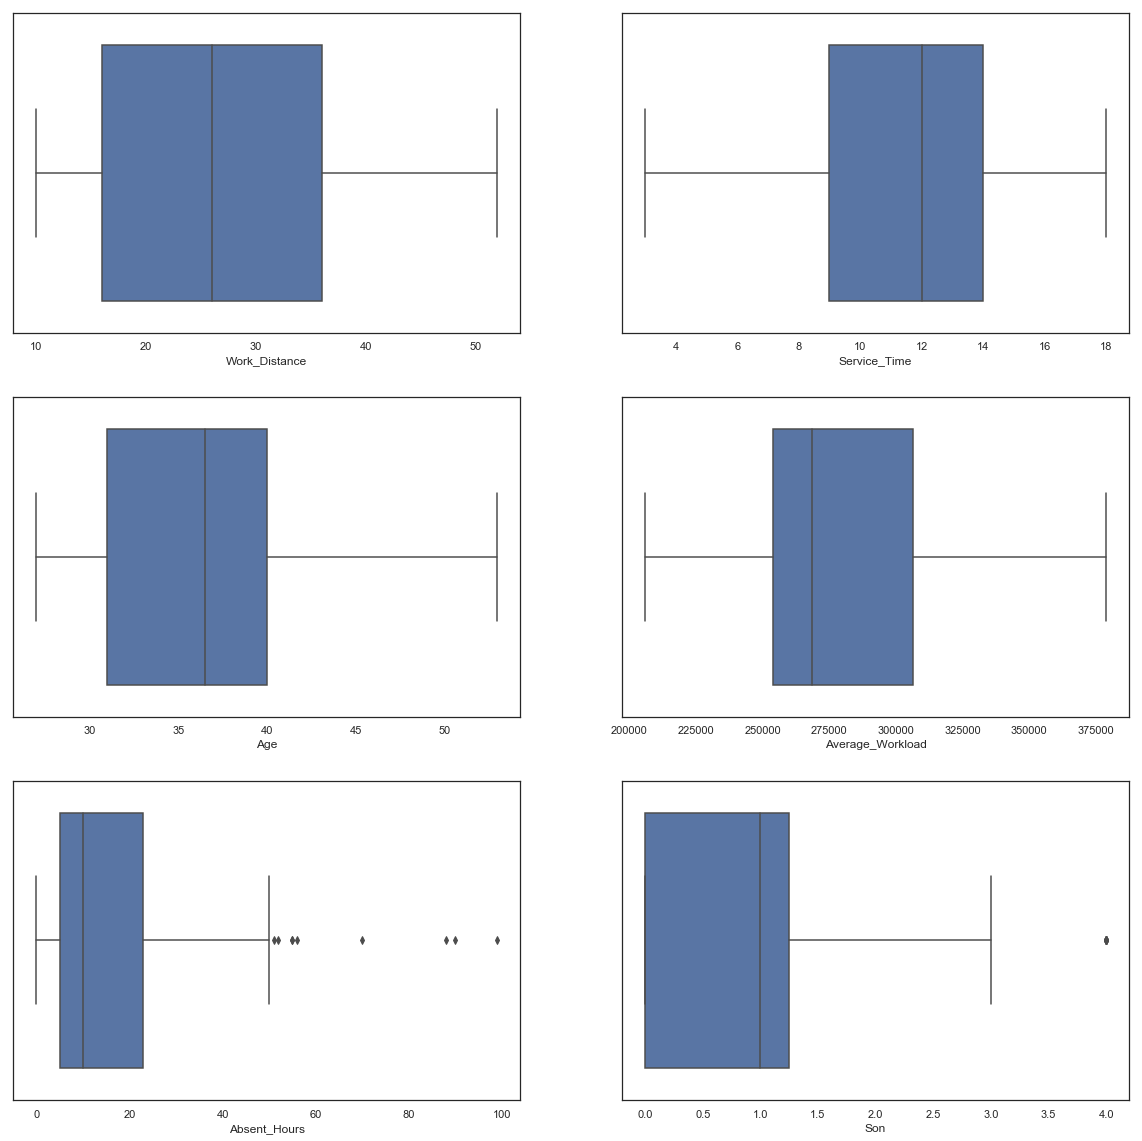

In [51]:
#----- Lets check for any outliers in the aggregated data -----
continous_var = ['Work_Distance','Service_Time','Age','Average_Workload','Absent_Hours','Son']
row = 3
col = 2
r = 0
c=0
i=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while r < row:
    c =0
    while c < col:
        sn.boxplot(x=continous_var[i], y=None, hue=None, data=emp, order=None, orient=None, ax=ax[r,c])
        c=c+1
        i=i+1
    r=r+1

In [52]:
# Clearly, 'Absent_Hours' has so many outliers, this will affect model. So, extreme outliers needs to be removed to make the model more generic.
# We are not removing outliers in service time, since the input data for 2011 is going to be same as 2010(except 'Age' and 'ServiceTime')

In [53]:
#----- Create a function to remove outliers from any column, from any database
def remove_outlier(df_in, col_name):
    q1 = np.percentile(df_in[col_name],25)
    q3 = np.percentile(df_in[col_name],75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [54]:
#--- remove out liers
continous_var = ['Service_Time','Age','Absent_Hours']
for i in continous_var:
    emp = remove_outlier(emp,i)

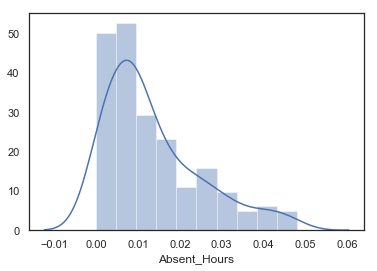

In [55]:
# Check the distribution of target feature.
#It seems better distributed then previous
sn.distplot(emp['Absent_Hours']/1000, bins=None, hist=True, kde=True)

In [56]:
emp.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1,11.0,14.0,37.0,330061.0,1.0,0.0,1.0
1,1,3,11.0,14.0,37.0,244387.0,1.0,0.0,16.0
2,1,4,11.0,14.0,37.0,326452.0,1.0,0.0,11.0
3,1,5,11.0,14.0,37.0,246074.0,1.0,0.0,16.0
4,1,6,11.0,14.0,37.0,377550.0,1.0,0.0,24.0


In [57]:
emp.shape

(170, 9)

In [58]:
#--- As we can clearly see that the dataset has different features of differenr range/scale.
#--- Lets standardise the range/scale for better performance of model
#--We can use scikit-learn preprocessing library functions StandardScaler/Normalizer for the same.
# -- However, here I am using simple formula to standardize the scale
# ---------->>value(new) = (value(max) - value) / (value(max) - value(min))

In [59]:
def Standardize_Values(df):
    df_new = df
    var = ['Work_Distance','Service_Time','Age','Average_Workload']
    for i in var:
        df_new[i] = (np.max(df_new[i]) - df_new[i]) / (np.max(df_new[i]) - np.min(df_new[i]))
    return df_new

In [60]:
#--- Standardize the values ---
emp_final = Standardize_Values(emp)
emp_final.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1,0.97619,0.266667,0.615385,0.282268,1.0,0.0,1.0
1,1,3,0.97619,0.266667,0.615385,0.777588,1.0,0.0,16.0
2,1,4,0.97619,0.266667,0.615385,0.303133,1.0,0.0,11.0
3,1,5,0.97619,0.266667,0.615385,0.767834,1.0,0.0,16.0
4,1,6,0.97619,0.266667,0.615385,0.007712,1.0,0.0,24.0


In [61]:
#------------ Done preparing data for modelling -------------

In [62]:
#----------Part 5 : Model Builing starts here ----------------------

# 2.2 Modeling
After a thorough preprocessing we will be using some regression models on our
processed data to predict the target variable. Following are the models which we have built –

# 2.2.1 Random Forest
Random Forest is an ensemble technique that consists of many decision trees. The idea
behind Random Forest is to build n number of trees to have more accuracy in dataset. It is
called random forest as we are building n no. of trees randomly. In other words, to build the
decision trees it selects randomly n no of variables and n no of observations to build each
decision tree. It means to build each decision tree on random forest we are not going to use the
same data. The RMSE value and R^2 value for our project in R and Python are –
Random Forest R PYTHON
RMSE Train
 2.1916027
1.107575985353846
RMSE Test
 2.760676
2.7558238490987432

# 2.2.2 Liner Regression
Linear Regression is one of the statistical methods of prediction. It is applicable only on
continuous data. To build any model we have some assumptions to put on data and model.
Here are the assumptions to the linear regression model.
Linear Regression R PYTHON
RMSE Train
 2.3887731
2.4050714625644045
RMSE Test
 2.6049870
3.182751138956921


In [63]:
# 1.) I am selecting 3 models to test and evaluate
 #   -> Linear Regression Model
 #   -> Random Forrest (ensemble method using bagging technique)
 #   -> Gradient Boosting (ensemble method using boosting technique)
#2.) Cross validation    
#3.) All these 3 models will be compared and evaluated
#4.) We'll choose the best out of 3

In [64]:
#--- define a function which takes model, predicted and test values and returns evalution matrix: R-squared value,RootMeanSquared,MeanAbsoluteError
def model_eval_matrix(model,X_test,Y_test,Y_predict):
    r_squared = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_squared,mse,rmse, mae

In [65]:
#train,test = train_test_split(emp_final, test_size=0.20, random_state=1)
train = emp_final[:80]
test = emp_final[20:]
X_train = train.drop(columns = ['Absent_Hours','ID'])
#Y_train = np.log(train.Absent_Hours)
Y_train = train.Absent_Hours/1000
X_test = test.drop(columns = ['Absent_Hours','ID'])
#Y_test = np.log(test.Absent_Hours)
Y_test = test.Absent_Hours/1000

In [66]:
#--Define Linear regession model --
lrm_regressor = LinearRegression()
lrm_regressor.fit(X_train, Y_train)
Y_predict_lrm =lrm_regressor.predict(X_test)

In [67]:
#------- Random Forest Model (Ensemble method using Bagging technique) --------------
forest_reg = RandomForestRegressor(n_estimators=2000, criterion='mse', max_depth=10, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=20, min_impurity_decrease=0.00, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=1, verbose=0, warm_start=False)
forest_reg.fit(X_train, Y_train)
Y_predict_forest =forest_reg.predict(X_test)

In [68]:
## ----------- Building XGBoost Model (Ensemble method using Boosting technique) ---------------
#xgb_reg = GradientBoostingRegressor(random_state=1) # without parameter hypertuning
# Following model is with parameter hypertuning
xgb_reg = GradientBoostingRegressor(loss='ls', learning_rate=0.2, n_estimators=2000, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=1, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=15, warm_start=False, presort='auto')
xgb_reg.fit(X_train, Y_train)
Y_predict_xgb = xgb_reg.predict(X_test)

In [69]:
#---Stroring all model performances in dataframe to compare----
metric=[]
ml_models=['Linear Reg','Random Forest','GradientBoost']
fitted_models= [lrm_regressor,forest_reg,xgb_reg]
Y_Predict =[Y_predict_lrm,Y_predict_forest,Y_predict_xgb]
i=0
for mod in ml_models:
    R_SQR,MSE,RMSE,MAE = model_eval_matrix(fitted_models[i],X_test,Y_test,Y_Predict[i])
    metric.append([mod,R_SQR,MSE,RMSE,MAE])
    i=i+1
df_mod_performance=pd.DataFrame(metric,columns =['Model','R-Squared','MeanSquaredError','RootMeanSquaredError','MeanAbsoluteError'])
df_mod_performance[['Model','RootMeanSquaredError']]

,Model,RootMeanSquaredError
0,Linear Reg,0.011577
1,Random Forest,0.010292
2,GradientBoost,0.010731


In [70]:
#Clearly, Random Forest proves to be best model here -----
# We'll use Random forest as our final model to predict 2011 losses due to absence
# FINAL MODE :: RANDOM FOREST

In [71]:
absence_prediction=X_test
absence_prediction['Absent_Hours'] = 1000*Y_test
absence_prediction['Predicted_Absent_Hours'] = 1000*Y_predict_forest
#final_bike_prediction_df['Predicted_Absent_Hours'] = round(final_bike_prediction_df['Predicted_Absent_Hours'])
#--- Sample output(with actual counts and predicted counts) ---
absence_prediction.head()

,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours,Predicted_Absent_Hours
23,1,0.761905,0.333333,0.384615,0.282268,1.0,1.0,8.0,7.894942
24,5,0.761905,0.333333,0.384615,0.767834,1.0,1.0,24.0,15.761997
25,6,0.761905,0.333333,0.384615,0.722259,1.0,1.0,8.0,8.965242
26,7,0.761905,0.333333,0.384615,0.660704,1.0,1.0,12.0,12.353215
27,8,0.761905,0.333333,0.384615,0.746310,1.0,1.0,8.0,10.613901


In [72]:
#Predicted absence hours of 2010
absence_prediction.Predicted_Absent_Hours.sum()

2310.762149520413

In [73]:
#Actual absence hours of 2010
absence_prediction.Absent_Hours.sum()

1992.0

In [74]:
#--- Predicted absence hours per month 
absence_prediction.groupby('Absence_Month').sum().reset_index()[['Absence_Month','Absent_Hours','Predicted_Absent_Hours']]

,Absence_Month,Absent_Hours,Predicted_Absent_Hours
0,0.0,0.0,18.496546
1,1.0,65.0,73.456819
2,2.0,172.0,176.749155
3,3.0,128.0,154.830896
4,4.0,207.0,214.570853
5,5.0,186.0,242.066387
6,6.0,199.0,211.334615
7,7.0,218.0,202.448308
8,8.0,127.0,239.327770
9,9.0,100.0,203.107395


Since, random forest model is our final model to be used for prediction, We'll use this model to predict the losses of 2011.
Let's prepare data for 2011

To prepare data for 2011,assuming that all the employees are retained in 2011 and all other condition remains and same trends continues, we need to add +1 to 'Service_Time' and 'Age'(keeping all other features same)

In [75]:
#--------data fo 2011
#--- service and age will be added by 1

emp_2011 = emp
emp_2011.Service_Time = emp.Service_Time + 1
emp_2011.Age = emp.Age + 1

In [76]:
emp_2011= emp_2011.drop(columns = ['Absent_Hours','ID'])

In [77]:
#-------- Standardise the scale, before passing the input to model
emp_2011 = Standardize_Values(emp_2011)

In [78]:
predict_2011_absence =forest_reg.predict(emp_2011)

In [79]:
absence_prediction_2011=emp_2011
absence_prediction_2011['Predicted_Absent_Hours'] = predict_2011_absence*1000

absence_prediction_2011

,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Predicted_Absent_Hours
0,1,0.023810,0.733333,0.384615,0.717732,1.0,0.0,7.683637
1,3,0.023810,0.733333,0.384615,0.222412,1.0,0.0,15.969510
2,4,0.023810,0.733333,0.384615,0.696867,1.0,0.0,12.023968
3,5,0.023810,0.733333,0.384615,0.232166,1.0,0.0,18.475563
4,6,0.023810,0.733333,0.384615,0.992288,1.0,0.0,9.231385
5,7,0.023810,0.733333,0.384615,0.339296,1.0,0.0,21.609729
6,8,0.023810,0.733333,0.384615,0.345141,1.0,0.0,21.760845
7,10,0.023810,0.733333,0.384615,0.341684,1.0,0.0,20.062100
8,11,0.023810,0.733333,0.384615,0.451612,1.0,0.0,18.019666
9,12,0.023810,0.733333,0.384615,0.320229,1.0,0.0,18.240195


In [80]:
monthly_absence= absence_prediction_2011.groupby('Absence_Month').sum().reset_index()[['Absence_Month','Predicted_Absent_Hours']]
monthly_absence

,Absence_Month,Predicted_Absent_Hours
0,0.0,21.820853
1,1.0,63.018338
2,2.0,174.467844
3,3.0,178.242122
4,4.0,239.215215
5,4.5,13.337524
6,5.0,284.683773
7,6.0,168.837485
8,7.0,315.067282
9,8.0,318.160627


In [81]:
#lets say in a month excluding weekend 22 days are working days. total working hours of 36 employees will be 22*8*36.
# total losses % = (absent_hours / Total_Hours)*100
tot_Monthly_hours = 22*8*36
monthly_absence['monthly_loss_percentage'] = (monthly_absence['Predicted_Absent_Hours']/tot_Monthly_hours) * 100

In [82]:
#---------MONTHLY LOSSES PREDICTED FOR YEAR 2011 PER MONTH -----------

In [83]:
monthly_absence

,Absence_Month,Predicted_Absent_Hours,monthly_loss_percentage
0,0.0,21.820853,0.344395
1,1.0,63.018338,0.994608
2,2.0,174.467844,2.753596
3,3.0,178.242122,2.813165
4,4.0,239.215215,3.775493
5,4.5,13.337524,0.210504
6,5.0,284.683773,4.493115
7,6.0,168.837485,2.664733
8,7.0,315.067282,4.972653
9,8.0,318.160627,5.021475


In [84]:
#---------------------------------------------------------------------

In [85]:
# Hereby, concluding the project with above predictions 

# 3.0 Conclusion
In this chapter we are going to evaluate our models, select the best model for our dataset and
try to get answers of the asked questions.
3.1 Model Evaluation
In the previous chapter we have seen the Root Mean Square Error (RMSE) and R-Squared Value
of different models. Root Mean Square Error (RMSE) is the standard deviation of the residuals
(prediction errors). Residuals are a measure of how far from the regression line data points are, RMSE is
a measure of how spread out these residuals are. In other words, it tells you how concentrated the data
is around the line of best fit. Whereas R-squared is a relative measure of fit, RMSE is an absolute
measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of
the unexplained variance, and has the useful property of being in the same units as the response
variable. Lower values of RMSEand higher value of R-Squared Value indicate better fit.
3.2 Model Selection
From the observation of all RMSE Value and R-Squared Value we have concluded that Linear
Regression Model has minimum value of RMSE and it’sR-Squared Value is also maximum (i.e. 1).
The RMSE value of Testing data and Training does not differs a lot this implies that it is not the case of
overfitting.